<a href="https://colab.research.google.com/github/Naomie25/DI-Bootcamp/blob/main/Week3_Day5_DailyChallenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
df=pd.read_excel('/content/US Superstore data.xls')
print(df.head())

   Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3       4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4       5  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   South  FUR-BO-10

In [3]:
# 1. Handle missing values
df_clean = df.dropna()

# 2. Convert date columns to datetime dtype
df_clean['Order Date'] = pd.to_datetime(df_clean['Order Date'])
df_clean['Ship Date'] = pd.to_datetime(df_clean['Ship Date'])

# 3. Remove duplicates if any
df_clean = df_clean.drop_duplicates()

# 4. Fix data types if necessary (example: Postal Code to string)
df_clean['Postal Code'] = df_clean['Postal Code'].astype(str)

# 5. Create any new useful columns (optional)
# Example: Calculate shipping duration in days
df_clean['Shipping Duration'] = (df_clean['Ship Date'] - df_clean['Order Date']).dt.days

# Check cleaned data info
print(df_clean.info())
print(df_clean.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Row ID             9994 non-null   int64         
 1   Order ID           9994 non-null   object        
 2   Order Date         9994 non-null   datetime64[ns]
 3   Ship Date          9994 non-null   datetime64[ns]
 4   Ship Mode          9994 non-null   object        
 5   Customer ID        9994 non-null   object        
 6   Customer Name      9994 non-null   object        
 7   Segment            9994 non-null   object        
 8   Country            9994 non-null   object        
 9   City               9994 non-null   object        
 10  State              9994 non-null   object        
 11  Postal Code        9994 non-null   object        
 12  Region             9994 non-null   object        
 13  Product ID         9994 non-null   object        
 14  Category

In [7]:
pip install plotly

In [8]:
import pandas as pd
import plotly.express as px

# Ensure Order Date is datetime type
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Extract year from order date
df['Year'] = df['Order Date'].dt.year

# Aggregate total sales by year
sales_by_year = df.groupby('Year')['Sales'].sum().reset_index()

# Create interactive line chart
fig = px.line(sales_by_year, x='Year', y='Sales',
              title='Sales Trends Over Years',
              markers=True)

fig.show()

In [9]:
#Sales distribution by country
# Aggregate sales by country
sales_by_country = df.groupby('Country')['Sales'].sum().reset_index()

# Create an interactive choropleth map
fig = px.choropleth(sales_by_country,
                    locations='Country',
                    locationmode='country names',  # Using country names
                    color='Sales',
                    color_continuous_scale='Viridis',
                    title='Sales Distribution by Country',
                    labels={'Sales': 'Total Sales'})

fig.show()


In [10]:
pip install seaborn


In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Optional for better aesthetics
sns.set(style="whitegrid")


<ipython-input-12-55980b0f144d>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




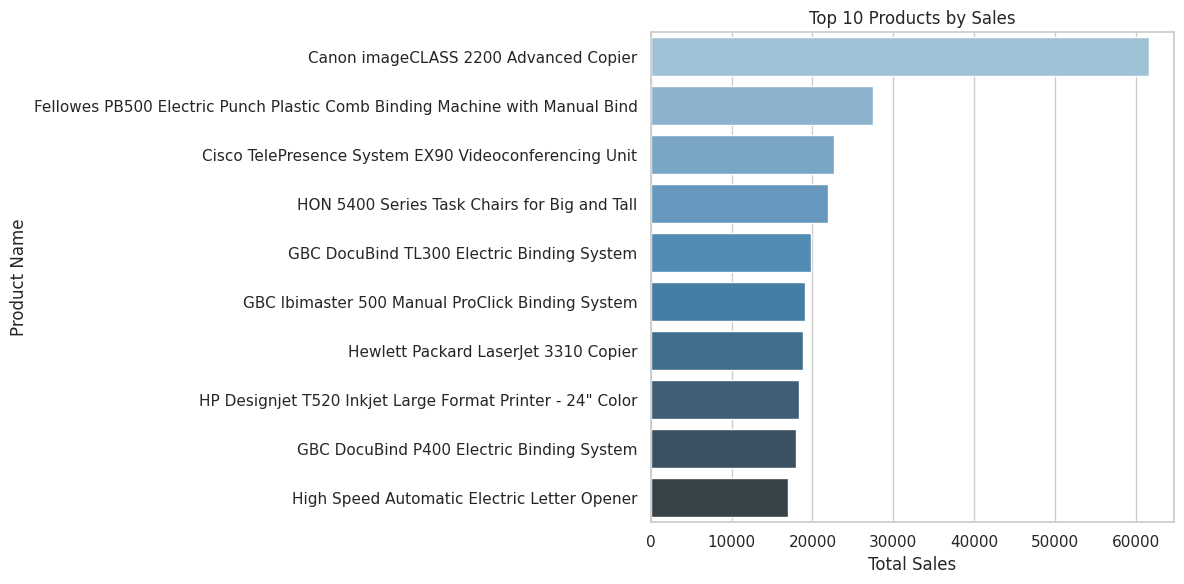

In [12]:
# Aggregate sales by product
product_sales = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)

# Reset index for plotting
top10_products = product_sales.reset_index()

# Bar plot
plt.figure(figsize=(12,6))
sns.barplot(data=top10_products, x='Sales', y='Product Name', palette='Blues_d')
plt.title('Top 10 Products by Sales')
plt.xlabel('Total Sales')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()


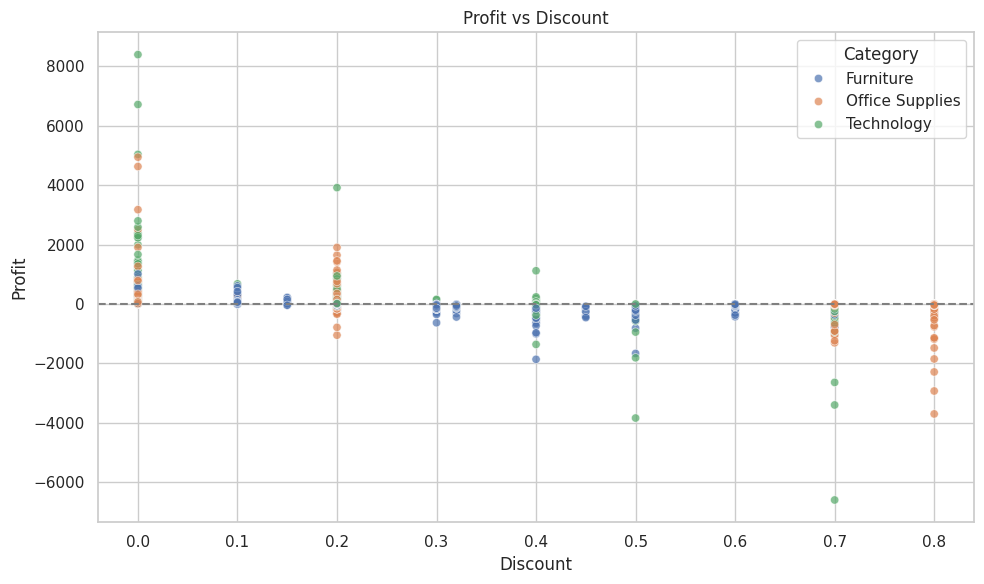

In [13]:
# Scatter Plot: Relationship Between Profit and Discount
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Discount', y='Profit', hue='Category', alpha=0.7)
plt.title('Profit vs Discount')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.axhline(0, color='gray', linestyle='--')  # reference line for 0 profit
plt.tight_layout()
plt.show()

We need to use Seaborn for:

- Quick and insightful data analysis.

- High-level exploratory visualizations.

- Automatically beautiful and well-labeled charts.

Use Matplotlib when:

- You need full control over every aspect of the plot.

- You're building complex, layered, or highly customized visuals.

